In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor,plot_tree
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Regression/MultipleLinearRegression/MultipleLinearRegression.csv')
print(data.head())
print(data.tail())

   YearsExperience   Age  Salary
0              1.1  21.0   39343
1              1.3  21.5   46205
2              1.5  21.7   37731
3              2.0  22.0   43525
4              2.2  22.2   39891
    YearsExperience   Age  Salary
25              9.0  34.0  105582
26              9.5  35.0  116969
27              9.6  36.0  112635
28             10.3  37.0  122391
29             10.5  38.0  121872


In [3]:
data.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

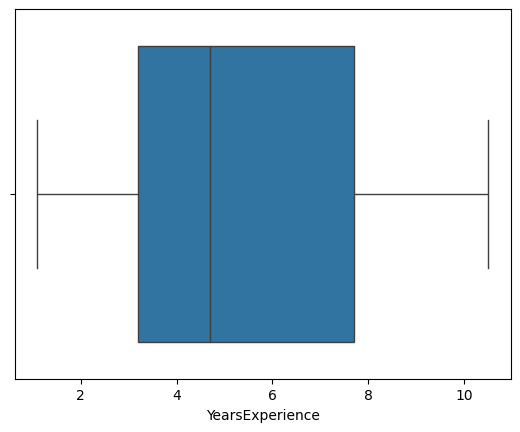

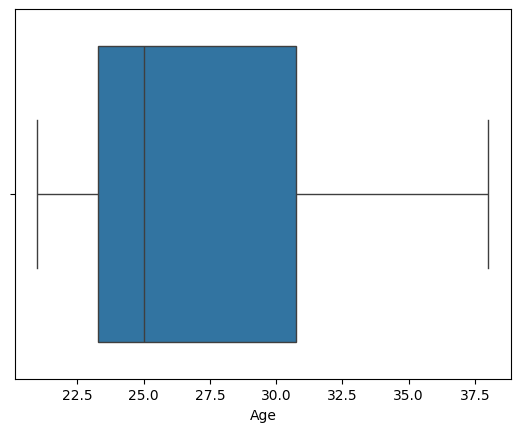

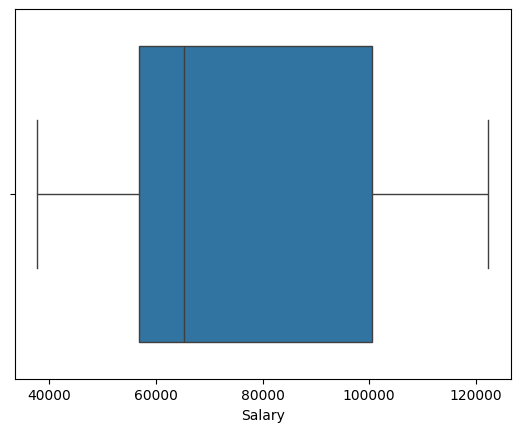

In [4]:
for i in data:
    sns.boxplot(x=i,data=data)
    plt.show()

In [5]:
x=data.iloc[:,:-1]
y=data['Salary']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

best_score = 0
best_state = 0
best_depth = 0
min_diff = float('inf')

# Loop through all random states
for state in range(0, 101):
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=state)

    for depth in range(1, 21):
        model = DecisionTreeRegressor(max_depth=depth, random_state=state)
        model.fit(X_train, y_train)

        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)
        diff = abs(train_acc - test_acc)

        # Choose only if test_acc is high and train-test diff is low
        if test_acc > best_score or (test_acc == best_score and diff < min_diff):
            best_score = test_acc
            best_state = state
            best_depth = depth
            min_diff = diff

# Final output
print("✅ Best Random State:", best_state)
print("✅ Best Max Depth:", best_depth)
print(f"✅ Best Test Accuracy: {best_score*100:.2f}%")
print(f"✅ Min Train-Test Accuracy Diff: {min_diff:.4f}")


✅ Best Random State: 84
✅ Best Max Depth: 6
✅ Best Test Accuracy: 99.36%
✅ Min Train-Test Accuracy Diff: 0.0033


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=best_state)

In [8]:
dtr=DecisionTreeRegressor(max_depth=best_depth)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [9]:
dtr.score(x_test,y_test)

0.9936388148664552

In [10]:
scaled_value = scaler.transform([[10.5,38]])
dtr.predict(scaled_value)



/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([121872.])

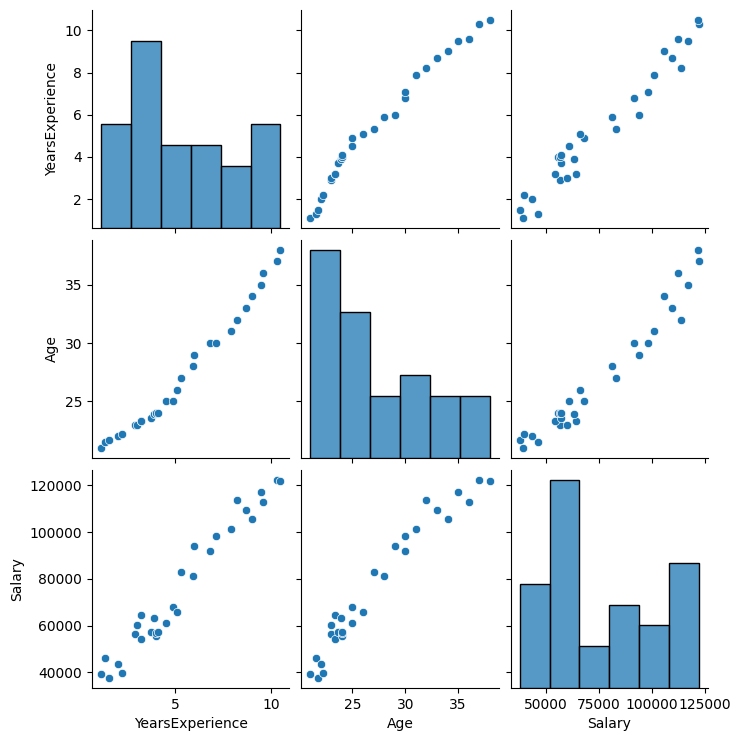

In [11]:
sns.pairplot(data=data)
plt.show()

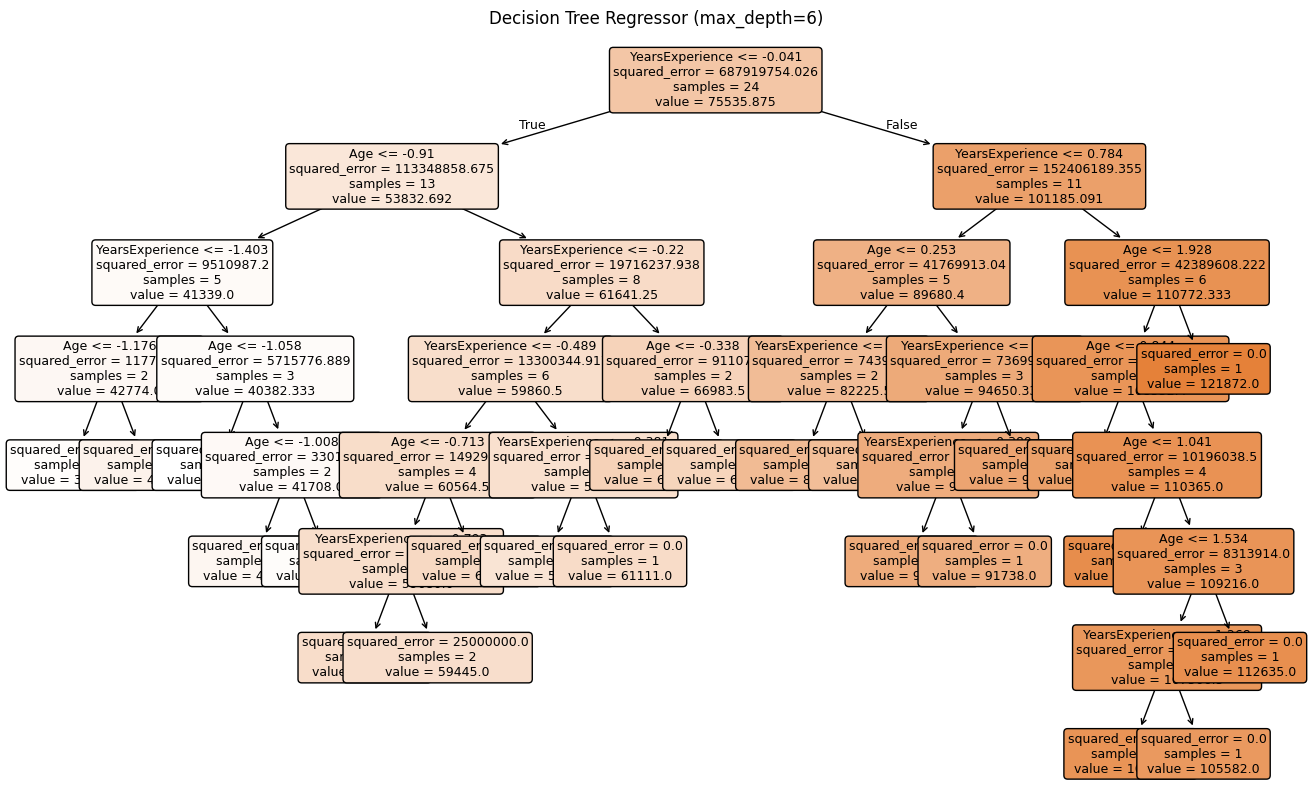

In [12]:

# Visualize the tree
plt.figure(figsize=(16, 10))
plot_tree(
    model,
    feature_names=x.columns,
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title(f"Decision Tree Regressor (max_depth={best_depth})")
plt.savefig("assets/DecisionTreeRegressor.jpg")
plt.show()


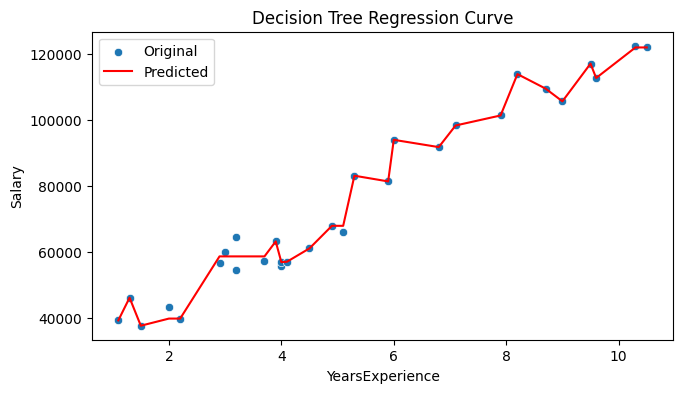

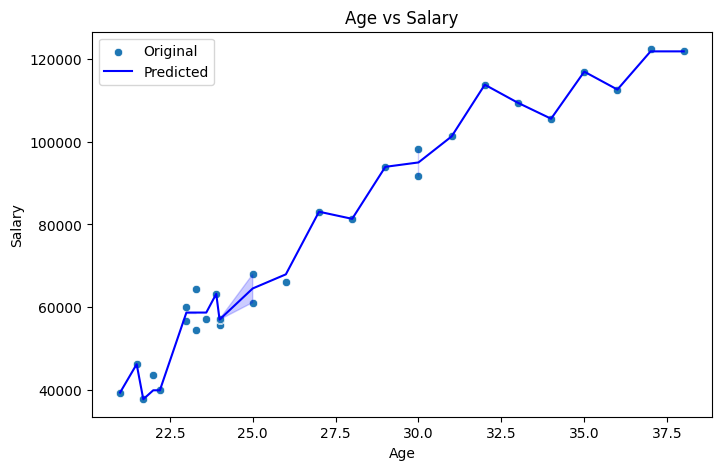

In [13]:
# Predicted salaries
yprd=dtr.predict(x_scaled)



# Scatter + Line Plot: YearsExperience vs Salary
plt.figure(figsize=(7.5,4))
sns.scatterplot(x='YearsExperience', y='Salary', data=data, label='Original')
sns.lineplot(x='YearsExperience', y=yprd, data=data, color='red', label='Predicted')
plt.title("Decision Tree Regression Curve")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.savefig("assets/DecisionTreeRegressionCurve1.jpg")
plt.show()

# Scatter + Line Plot: Age vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Salary', data=data, label='Original')
sns.lineplot(x='Age', y=yprd, data=data, color='blue', label='Predicted')
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.savefig("assets/DecisionTreeRegressionCurve2.jpg")

plt.show()
